In [487]:
from IPython.core.pylabtools import figsize
%matplotlib inline
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector, plot_bloch_vector
from qiskit_aer import AerSimulator
from matplotlib import pyplot as plt

simulator = AerSimulator()

In [488]:
def run_with_plot(circuit, shots=1024, ax=None, should_show_close=True, figsize=None):
    counts = simulator.run(circuit, shots=shots).result().get_counts(circuit)
    if should_show_close:
        plt.close()
    plot_histogram(counts, ax=ax, figsize=figsize)
    if should_show_close:
        plt.show()
        plt.close()


def draw_bloch_sphere(state):
    plt.close()
    plot_bloch_multivector(state)
    plt.show()
    plt.close()


def draw_circuit(circuit):
    plt.close()
    circuit.draw('mpl')
    plt.show()
    plt.close()

# Упражнение 1

### 2)
Соберите схему, состоящую из двух
кубитов. Установите для одного кубита состояние |0>, а для второго - состояние |1>. Добавьте операцию измерения для обоих кубитов и выполните
получившуюся схему в режиме симуляции.

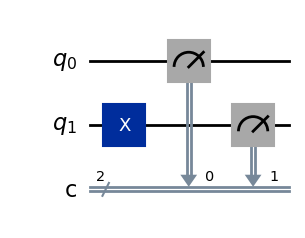

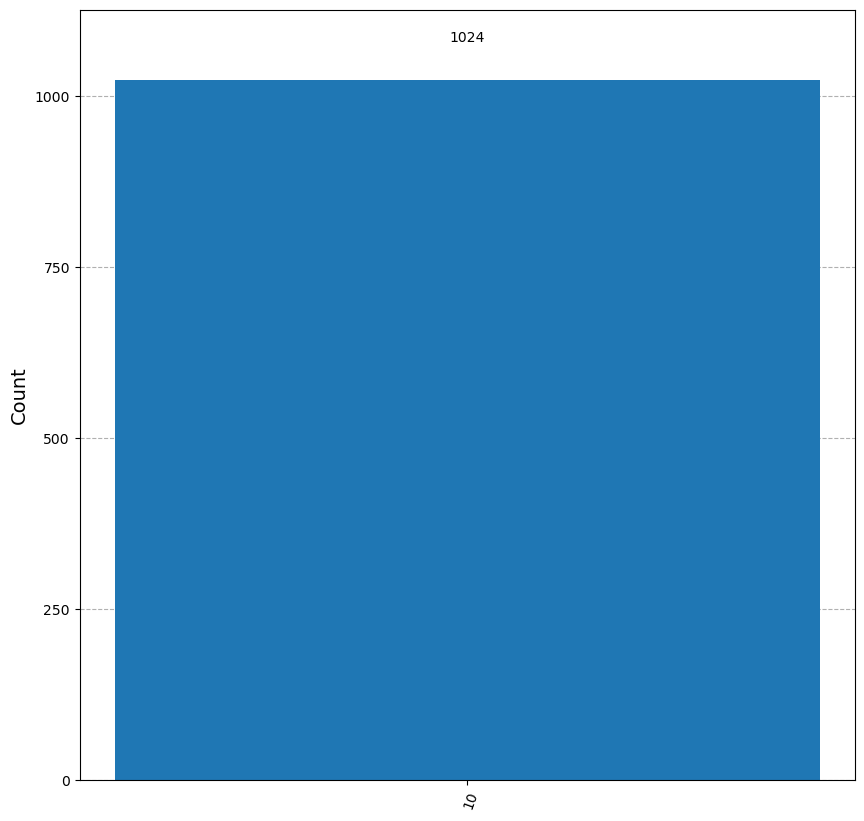

In [489]:
q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q_reg, c_reg)

circuit.x(q_reg[1])
circuit.measure(q_reg[1], c_reg[1])
circuit.measure(q_reg[0], c_reg[0])
draw_circuit(circuit)
run_with_plot(circuit, figsize=figsize(10, 10))

### 3)
Приведите кубит в состояние суперпозиции $\left( \sqrt{\frac{1}{2}}(|0\rangle + |1\rangle) \right)$. Примените измерение к кубиту. Для созданной схемы выполните симуляцию с числом запусков: 1, 2, 8, 32, 64, 128, 512, 1024, 8192. На основе полученных результатов сделайте выводы.


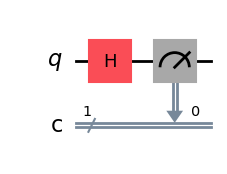

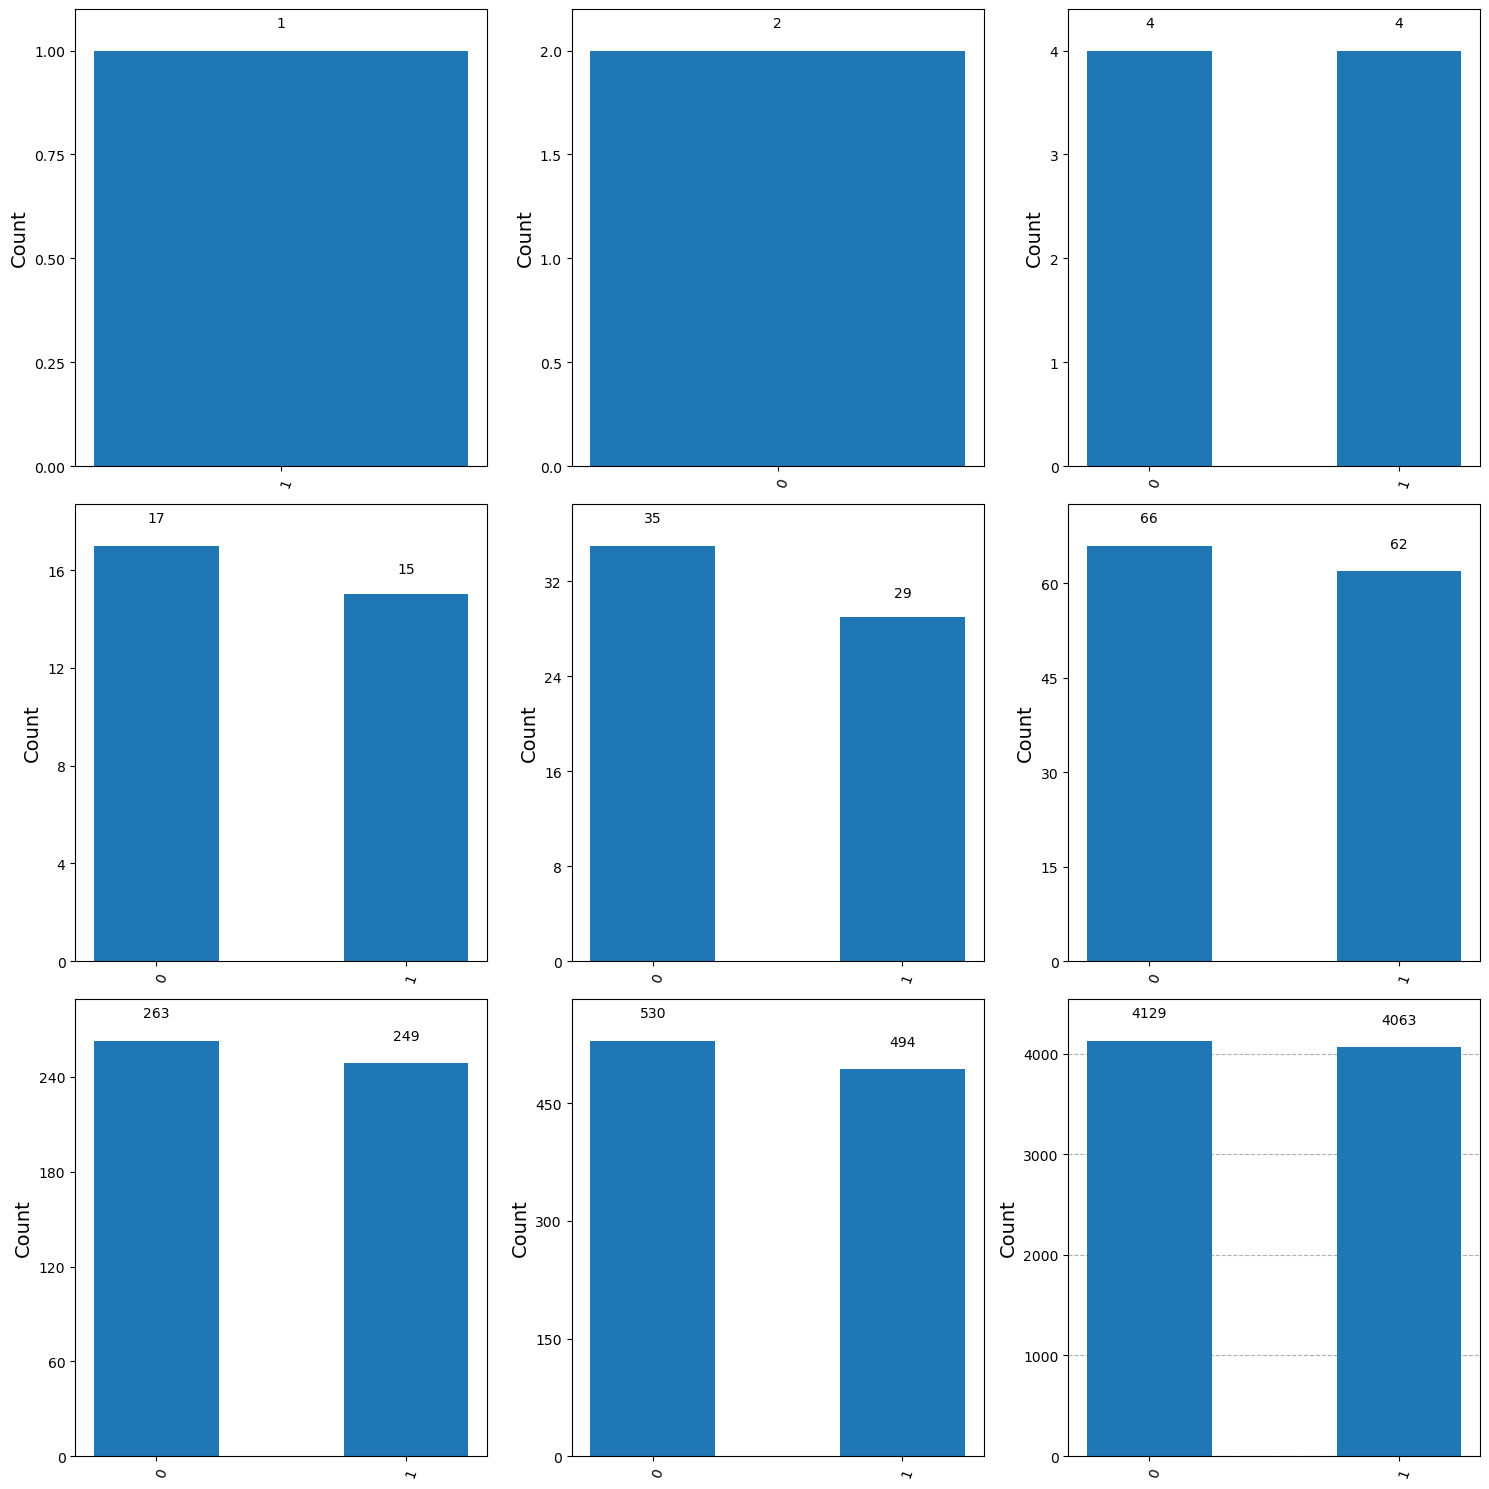

In [490]:
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)

circuit.h(q_reg[0])
circuit.measure(q_reg[0], c_reg[0])
draw_circuit(circuit)
fig, axs = plt.subplots(3, 3, figsize=figsize(15, 15))
for i, shots_num in enumerate([1, 2, 8, 32, 64, 128, 512, 1024, 8192]):
    run_with_plot(circuit, shots=shots_num, ax=axs[i // 3, i % 3], should_show_close=False)
plt.tight_layout()
plt.show()

При малом количестве измерений сложно подтвердить правильность работы алгоритма, однако при увеличении числа запусков распределение вероятностей начинает сходиться к теоретическому (при использовании идеального физического квантового компьютера, здесь подобный результат достигается моделированием распределения)  

### 4) 
Соберите квантовые схемы, показанные на рис. 17
<br>
Запустите 512 симуляций данных схем. Сделайте выводы на основе получившихся результатов.



![png17](images/lab1/img17.png)

4a; corrected?


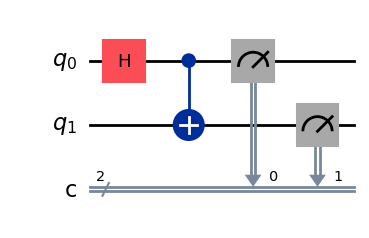

initial


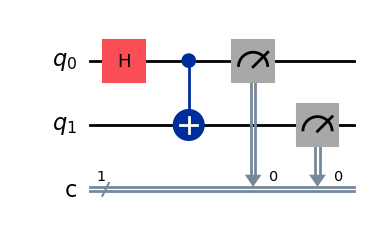

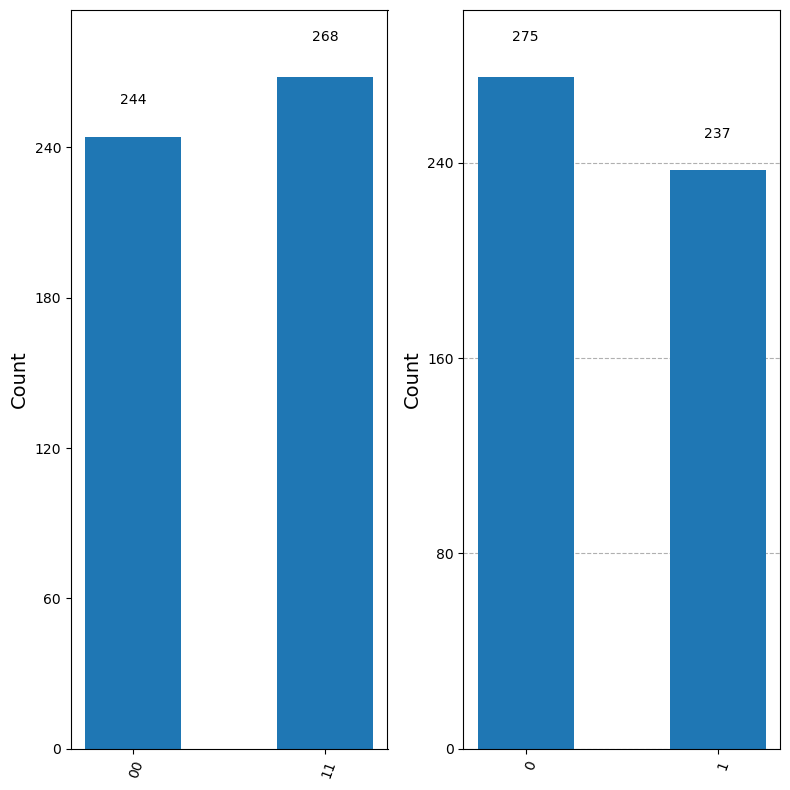

In [491]:
q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q_reg, c_reg)

circuit.h(q_reg[0])
circuit.cx(q_reg[0], q_reg[1])
circuit.measure(q_reg[0], c_reg[0])
circuit.measure(q_reg[1], c_reg[1])
print("4a; corrected?")
draw_circuit(circuit)

q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit_c1 = QuantumCircuit(q_reg, c_reg)

circuit_c1.h(q_reg[0])
circuit_c1.cx(q_reg[0], q_reg[1])
circuit_c1.measure(q_reg[0], c_reg[0])
circuit_c1.measure(q_reg[1], c_reg[0])

print("initial")
draw_circuit(circuit_c1)

_, axs = plt.subplots(1, 2, figsize=figsize(8, 8))
run_with_plot(circuit, shots=512, ax=axs[0], should_show_close=False)
run_with_plot(circuit_c1, shots=512, ax=axs[1], should_show_close=False)
plt.tight_layout()
plt.show()

Хотя, конкретно здесь нет большой разницы, измерять ли оба кубита или перезаписывать обычный бит значением второго кубита, так как кубиты запутанные, причём с одинаковыми значениями для конкретных состояний (|00> и |11>)

4b; corrected?


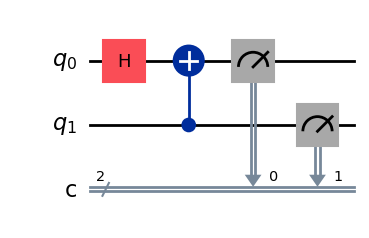

initial


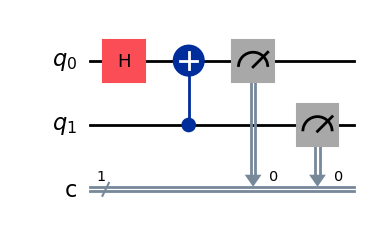

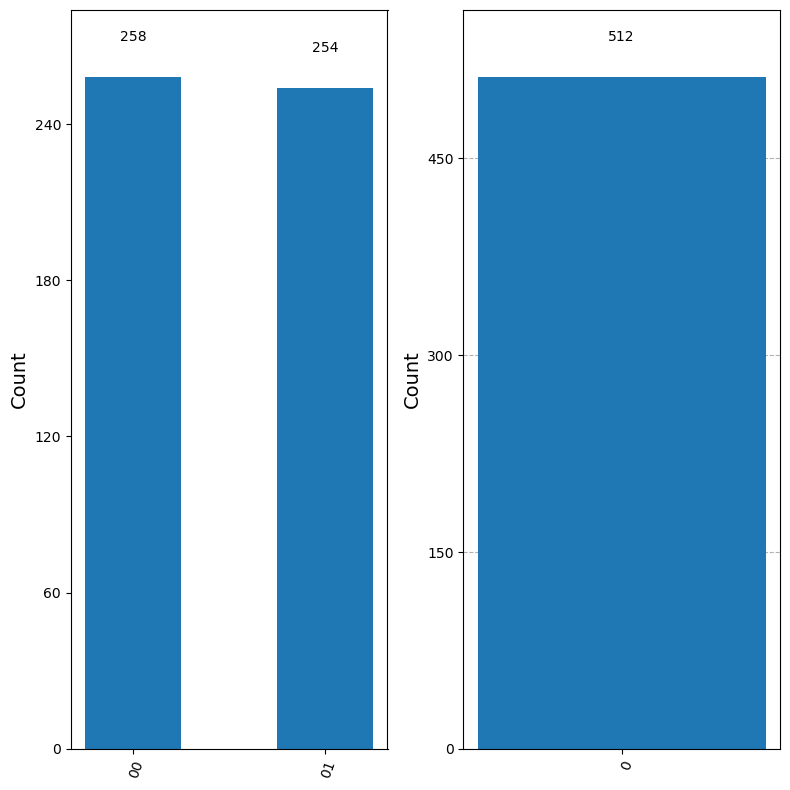

In [492]:
q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q_reg, c_reg)

circuit.h(q_reg[0])
circuit.cx(q_reg[1], q_reg[0])
circuit.measure(q_reg[0], c_reg[0])
circuit.measure(q_reg[1], c_reg[1])
print("4b; corrected?")
draw_circuit(circuit)

q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit_c1 = QuantumCircuit(q_reg, c_reg)

circuit_c1.h(q_reg[0])
circuit_c1.cx(q_reg[1], q_reg[0])
circuit_c1.measure(q_reg[0], c_reg[0])
circuit_c1.measure(q_reg[1], c_reg[0])
print("initial")
draw_circuit(circuit_c1)

_, axs = plt.subplots(1, 2, figsize=figsize(8, 8))
run_with_plot(circuit, shots=512, ax=axs[0], should_show_close=False)
run_with_plot(circuit_c1, shots=512, ax=axs[1], should_show_close=False)
plt.tight_layout()
plt.show()

Здесь q[1] равен |0>, он управляющий, поэтому состояние q[0] от него не зависит, кубиты - не запутанные, по измерению q[1] не узнать значение g[0].

### 5)
Создайте схемы, представленные на рис. 18 <br>
Запустите 512 симуляций данных схем. Сделайте выводы на основе получившихся результатов.

![png17](images/lab1/img18.png)

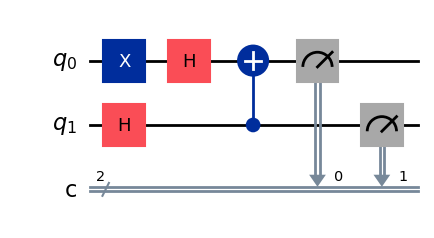

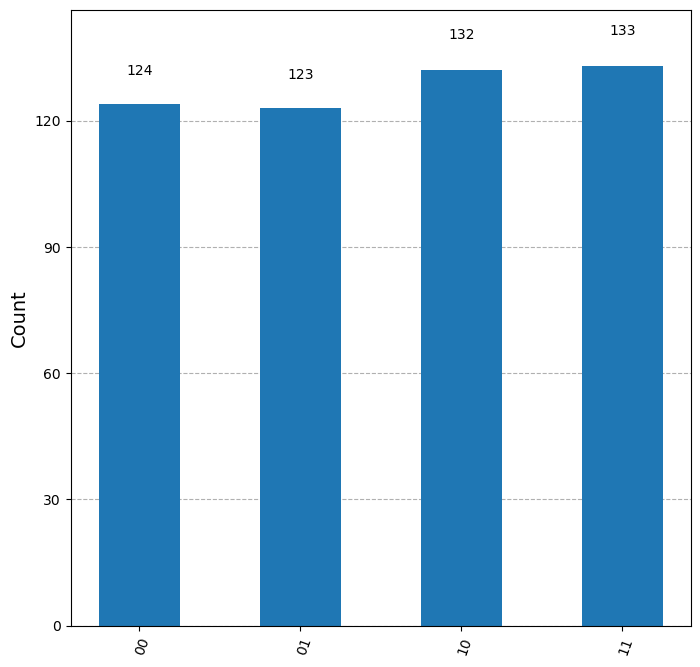

In [493]:
q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q_reg, c_reg)

circuit.x(q_reg[0])
circuit.h(q_reg[1])
circuit.h(q_reg[0])
circuit.cx(q_reg[1], q_reg[0])
circuit.measure(q_reg[0], c_reg[0])
circuit.measure(q_reg[1], c_reg[1])

draw_circuit(circuit)

run_with_plot(circuit, shots=512)

Все пары кубитов имеют одинаковую (0.25) вероятность измерения, состояние не запутанное

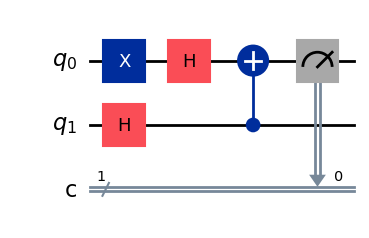

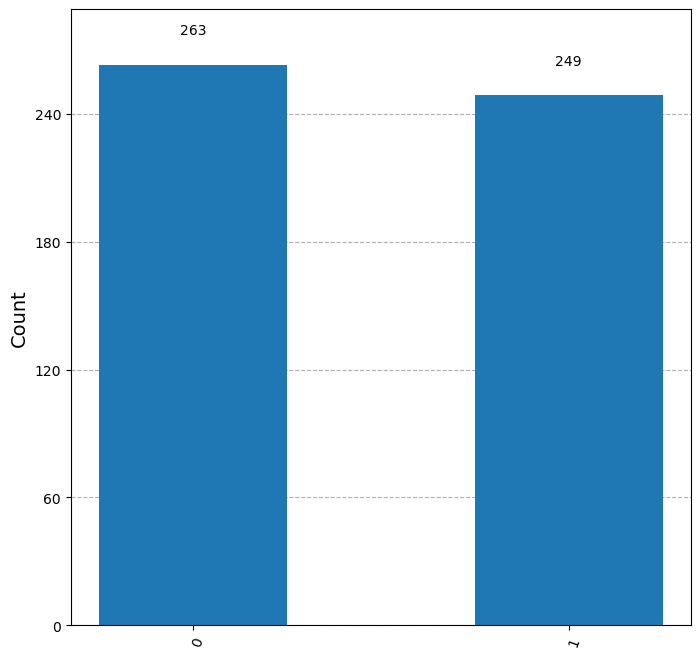

In [494]:
q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)

circuit.x(q_reg[0])
circuit.h(q_reg[1])
circuit.h(q_reg[0])
circuit.cx(q_reg[1], q_reg[0])
circuit.measure(q_reg[0], c_reg[0])

draw_circuit(circuit)

run_with_plot(circuit, shots=512)

По измерению лишь q[0] не получить значение q[1], в данном случае нам известно только значение q[0]

### 6)
Создайте схемы, представленные на рис. 19. Выполните симуляцию данных схем с числом измерений – 1024. Проанализируйте результаты симуляции и положение векторов на Q-сфере. Сделайте
выводы.

![png17](images/lab1/img19.png)

### a)

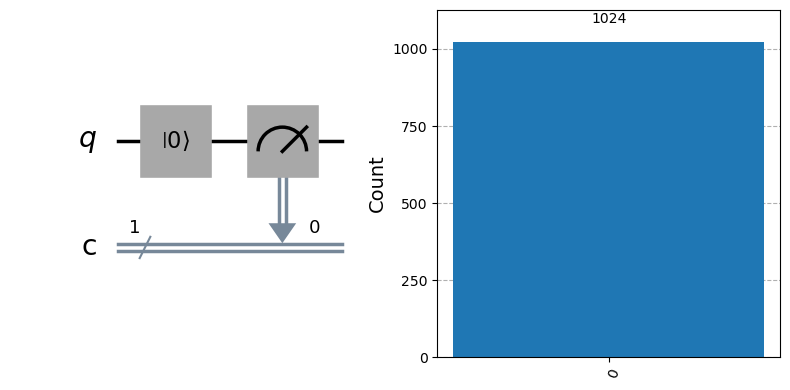

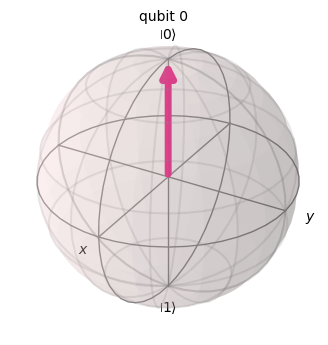

In [495]:
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)

circuit.reset(q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5,5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

plot_bloch_multivector(state)